# Bitcoin criptografia con python

## parte 1. Campos Finitos

Los campos finitos nos sirven para representar un número infinito de números dentro de un conjunto cerrado y finito. Por ejemplo el reloj, tienes de 0-24 hrs para representar un día. Yo podría calcular que hora es pasadas las 49 horas.
Serian las 01:00 (48 hrs son dos días, sobra una hora).

Con 24 números puedo representar cualquiero otro número de horas. 

In [1]:
from unittest import TestCase


#definiendo la clase de un campo finito
class FieldElement:
    def __init__(self, num, prime):
        #esta clase crea un objeto FieldElement
        #y verifica si un numero esta dentro del conjunto
        if num >= prime or num < 0:
            error = 'Num {} not in field range 0 to {}'.format(
num, prime - 1)
            raise ValueError(error)
        self.num = num
        self.prime = prime

    def __repr__(self):
        #la representacion del numero
        return 'FieldElement_{}({})'.format(self.prime, self.num)

    def __eq__(self, other):
        #definimos la igualdad: mismo numero y mismo primo base
        if other is None:
            return False
        return self.num == other.num and self.prime == other.prime
    
    def __add__(self, other):
        #definimos la suma en campo finito
        if self.prime != other.prime:
            raise TypeError('Cannot add two numbers in different Fields')
        num = (self.num + other.num) % self.prime
        #calcula el numero y crea una nueva clase fieldelement
        return self.__class__(num, self.prime)
    
    def __sub__(self, other):
        #definimos la resta
        if self.prime != other.prime:
            raise TypeError('Cannot sub two numbers in different Fields')
        num = (self.num - other.num) % self.prime
        return self.__class__(num, self.prime)
    
    def __mul__(self,other):
        #definimos la mult
        if self.prime != other.prime:
            raise TypeError('Cannot mul two numbers in different Fields')
        num = (self.num * other.num) % self.prime
        return self.__class__(num, self.prime)
    
    def __pow__(self,exponent):
        #definimos la potencia
        num = (self.num ** exponent) % self.prime
        return self.__class__(num, self.prime)
    
    def __ne__(self, other: object) -> bool:
        if other is None:
            return False
        return self.num != other.num or self.prime != other.prime
    def __truediv__(self, other):
        if self.prime != other.prime:
            raise TypeError('Cannot divide two numbers in different Fields')
        # self.num and other.num are the actual values
        # self.prime is what we need to mod against
        # use fermat's little theorem:
        # self.num**(p-1) % p == 1
        # this means:
        # 1/n == pow(n, p-2, p)
        num = (self.num * pow(other.num, self.prime - 2, self.prime)) % self.prime
        # We return an element of the same class
        return self.__class__(num, self.prime)

    def __rmul__(self, coefficient):
        num = (self.num * coefficient) % self.prime
        return self.__class__(num=num, prime=self.prime)




class FieldElementTest(TestCase):

    def test_ne(self):
        a = FieldElement(2, 31)
        b = FieldElement(2, 31)
        c = FieldElement(15, 31)
        self.assertEqual(a, b)
        self.assertTrue(a != c)
        self.assertFalse(a != b)

    def test_add(self):
        a = FieldElement(2, 31)
        b = FieldElement(15, 31)
        self.assertEqual(a + b, FieldElement(17, 31))
        a = FieldElement(17, 31)
        b = FieldElement(21, 31)
        self.assertEqual(a + b, FieldElement(7, 31))

    def test_sub(self):
        a = FieldElement(29, 31)
        b = FieldElement(4, 31)
        self.assertEqual(a - b, FieldElement(25, 31))
        a = FieldElement(15, 31)
        b = FieldElement(30, 31)
        self.assertEqual(a - b, FieldElement(16, 31))

    def test_mul(self):
        a = FieldElement(24, 31)
        b = FieldElement(19, 31)
        self.assertEqual(a * b, FieldElement(22, 31))

    def test_pow(self):
        a = FieldElement(17, 31)
        self.assertEqual(a**3, FieldElement(15, 31))
        a = FieldElement(5, 31)
        b = FieldElement(18, 31)
        self.assertEqual(a**5 * b, FieldElement(16, 31))

    

In [2]:
#%%timeit
import unittest

# Definición de la clase FieldElement y la clase FieldElementTest

# Crear instancia de TestLoader y cargar las pruebas desde FieldElementTest
loader = unittest.TestLoader();
tests = loader.loadTestsFromTestCase(FieldElementTest);

# Crear una instancia de TestSuite y agregar las pruebas cargadas
suite = unittest.TestSuite();
suite.addTests(tests);

# Ejecutar las pruebas y mostrar los resultados
runner = unittest.TextTestRunner();
result = runner.run(suite);


.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


## Codeando Curvas Elípticas en Python

Primer ejemplo del manejo de curvas elípticas


In [3]:
from unittest import TestCase

class Point:
    def __init__(self, x, y, a, b):
        self.a = a
        self.b = b
        self.x = x
        self.y = y
        if self.x is None and self.y is None:
            return
        if self.y**2 != self.x**3 + a * x + b:
            raise ValueError('({}, {}) is not on the curve'.format(x, y))

    def __repr__(self):
        if self.x is None:
            return 'Point(infinity)'
        elif isinstance(self.x, FieldElement):
            return 'Point({},{})_{}_{} FieldElement({})'.format(
                self.x.num, self.y.num, self.a.num, self.b.num, self.x.prime)
        else:
            return 'Point({},{})_{}_{}'.format(self.x, self.y, self.a, self.b)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y \
            and self.a == other.a and self.b == other.b
    
    def __add__(self, other):
        if self.a != other.a or self.b != other.b:
            raise TypeError('Points {}, {} are not on the same curve'.format(self, other))
        if self.x is None:
            return other
        if other.x is None:
            return self
        if self.x == other.x and self.y != other.y:
            return self.__class__(None, None, self.a, self.b)
        if self.x != other.x:
            s = (other.y - self.y) / (other.x - self.x)
            x = s**2 - self.x - other.x
            y = s * (self.x - x) - self.y
            return self.__class__(x, y, self.a, self.b)
        if self == other and self.y == 0 * self.x:
            return self.__class__(None, None, self.a, self.b)
        if self == other:
            s = (3 * self.x**2 + self.a) / (2 * self.y)
            x = s**2 - 2 * self.x
            y = s * (self.x - x) - self.y
            return self.__class__(x, y, self.a, self.b)
    
    def __ne__(self, other):
        return not (self == other)
    
    def __rmul__(self, coefficient):
        coef = coefficient
        current = self  # <1>
        result = self.__class__(None, None, self.a, self.b)  # <2>
        while coef:
            if coef & 1:  # <3>
                result += current
            current += current  # <4>
            coef >>= 1  # <5>
        return result



class PointTest(TestCase):

    def test_ne(self):
        a = Point(x=3, y=-7, a=5, b=7)
        b = Point(x=18, y=77, a=5, b=7)
        self.assertTrue(a != b)
        self.assertFalse(a != a)

    def test_on_curve(self):
        with self.assertRaises(ValueError):
            Point(x=-2, y=4, a=5, b=7)
        # these should not raise an error
        Point(x=3, y=-7, a=5, b=7)
        Point(x=18, y=77, a=5, b=7)

    def test_add0(self):
        a = Point(x=None, y=None, a=5, b=7)
        b = Point(x=2, y=5, a=5, b=7)
        c = Point(x=2, y=-5, a=5, b=7)
        self.assertEqual(a + b, b)
        self.assertEqual(b + a, b)
        self.assertEqual(b + c, a)

    def test_add1(self):
        a = Point(x=3, y=7, a=5, b=7)
        b = Point(x=-1, y=-1, a=5, b=7)
        self.assertEqual(a + b, Point(x=2, y=-5, a=5, b=7))

    def test_add2(self):
        a = Point(x=-1, y=1, a=5, b=7)
        self.assertEqual(a + a, Point(x=18, y=-77, a=5, b=7))



In [4]:
import unittest

# Definición de la clase FieldElement y la clase FieldElementTest

# Crear instancia de TestLoader y cargar las pruebas desde FieldElementTest
loader = unittest.TestLoader();
tests = loader.loadTestsFromTestCase(PointTest);

# Crear una instancia de TestSuite y agregar las pruebas cargadas
suite = unittest.TestSuite();
suite.addTests(tests);

# Ejecutar las pruebas y mostrar los resultados
runner = unittest.TextTestRunner();
result = runner.run(suite);


.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


## Curvas Elípticas sobre campos Finitos


In [5]:
a = FieldElement(num=0, prime=223)
b = FieldElement(num=7, prime=223)
x = FieldElement(num=192, prime=223)
y = FieldElement(num=105, prime=223)
p1 = Point(x, y, a, b)
print(p1)
#Point(192,105)_0_7 FieldElement(223)

Point(192,105)_0_7 FieldElement(223)


Los campos finitos tienen un comportamiento impredecible a como conocemos que son gráficas de funciones. Veamos un ejemplo de como se ve el grafico de una linea recta y=ax+b en cooredenadas reales y en campo finito

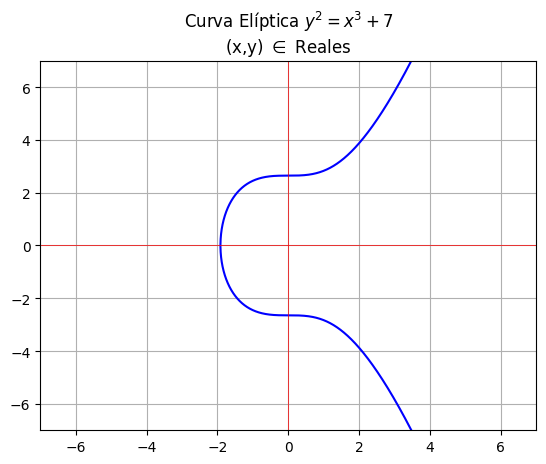

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# encontramos los puntos en la curva y^2=x^3+7
points = [(xi,np.sqrt(xi**3 + 7)) for xi in np.linspace(-3, 4, 10000) if(xi**3+7)>=0]

x, y = zip(*points)
x = np.array(x)
y = np.array(y)

# Crear la gráfica
plt.plot(x, y, color='blue')
plt.plot(x, -1*y,color='blue')
# Agregar etiquetas y título

plt.title('Curva Elíptica '+r'$y^2=x^3+7$'+'\n(x,y) $\in$ Reales')
plt.grid()

# Ajustar límites de los ejes
plt.xlim(-7,7)
plt.ylim(-7,7)

# Mostrar la gráfica

plt.axhline(0, color='red', linewidth=0.5)
plt.axvline(0, color='red', linewidth=0.5)

plt.show()


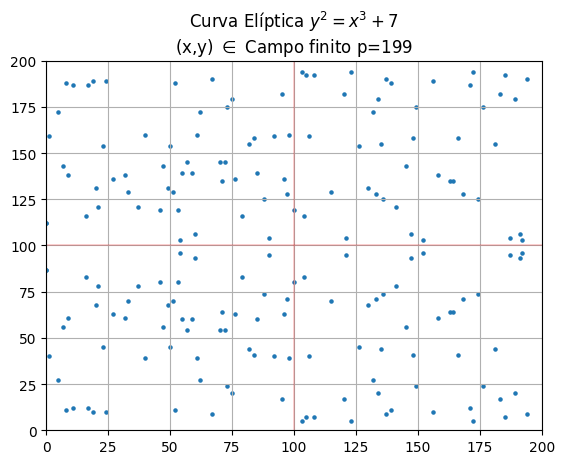

In [7]:
import matplotlib.pyplot as plt

p=199

x=[]
y=[]

for a in range(200):
    for b in range(200):
        if (b**2) % p == (a**3 + 7) % p:
            x.append(a%p)
            y.append(b%p)
      


# # Crear la gráfica
plt.scatter(x, y,s=5)
plt.axhline(100, color='red', linewidth=0.25)
plt.axvline(100, color='red', linewidth=0.25)
plt.title('Curva Elíptica '+r'$y^2=x^3+7$'+'\n(x,y) $\in$ Campo finito p=199')
plt.xlim(0,200)
plt.ylim(0,200)


plt.grid()

In [19]:
#testeamos el punto generador en la curva de Bitcoin
gx = 0x79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798
gy = 0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8
p = 2**256 - 2**32 - 977
print(gy**2 % p == (gx**3 + 7) % p)

True


In [9]:
#testeamos el orden n en la curva

gx = 0x79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798
gy = 0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8
p = 2**256 - 2**32 - 977
n = 0xfffffffffffffffffffffffffffffffebaaedce6af48a03bbfd25e8cd0364141
x = FieldElement(gx, p)
y = FieldElement(gy, p)
seven = FieldElement(7, p)
zero = FieldElement(0, p)
G1 = Point(x, y, zero, seven)
print((n-1)*G1+G1)

Point(infinity)


In [10]:
P = 2**256 - 2**32 - 977

class S256Field(FieldElement):
    def __init__(self, num, prime=None):
        super().__init__(num=num, prime=P)

    def __repr__(self):
        return '{:x}'.format(self.num).zfill(64)
    
A = 0
B = 7
N = 0xfffffffffffffffffffffffffffffffebaaedce6af48a03bbfd25e8cd0364141

class S256Point(Point):
    def __init__(self, x, y, a=None, b=None):
        a, b = S256Field(A), S256Field(B)
        if type(x) == int:
            super().__init__(x=S256Field(x), y=S256Field(y), a=a, b=b)
        else:
            super().__init__(x=x, y=y, a=a, b=b)

    def __rmul__(self, coefficient):
        coef = coefficient % N
        return super().__rmul__(coef)
    
    def __repr__(self):
        if self.x is None:
            return 'S256Point(infinity)'
        else:
            return 'S256Point({}, {})'.format(self.x, self.y)
    
    def verify(self, z, sig):
        s_inv = pow(sig.s, N - 2, N)
        u = z * s_inv % N
        v = sig.r * s_inv % N
        total = u * G + v * self
        return total.x.num == sig.r
    


class PrivateKey:
    def __init__(self, secret):
        self.secret = secret
        self.point = secret * G
    def hex(self):
        return '{:x}'.format(self.secret).zfill(64)

In [11]:
# verificamos que el punto Gx,Gy pertenece a la curva
G = S256Point(0x79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798,0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8)
G

S256Point(79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798, 483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8)

In [12]:
print(N*G)

S256Point(infinity)


In [13]:
#VERIFICANDO FIRMA

z = 0xbc62d4b80d9e36da29c16c5d4d9f11731f36052c72401a76c23c0fb5a9b74423
r = 0x37206a0610995c58074999cb9767b87af4c4978db68c06e8e6e81d282047a7c6
s = 0x8ca63759c1157ebeaec0d03cecca119fc9a75bf8e6d0fa65c841c8e2738cdaec
px = 0x04519fac3d910ca7e7138f7013706f619fa8f033e6ec6e09370ea38cee6a7574
py = 0x82b51eab8c27c66e26c858a079bcdf4f1ada34cec420cafc7eac1a42216fb6c4
point = S256Point(px, py)
s_inv = pow(s, N-2, N)
u = z * s_inv % N
v = r * s_inv % N
print((u*G + v*point).x.num == r)


True


In [14]:
class Signature:
    def __init__(self, r, s):
        self.r = r
        self.s = s
    def __repr__(self):
        return 'Signature({:x},{:x})'.format(self.r, self.s)




In [15]:
from hashlib import sha256

def hash256(s):
    '''two rounds of sha256'''
    return sha256(sha256(s).digest()).digest()


z = int.from_bytes(hash256(b'my message'), 'big')
e = int.from_bytes(hash256(b'my secret'), 'big')
k = 1234567890
r = (k*G).x.num
k_inv = pow(k, N-2, N)
s = (z+r*e) * k_inv % N
point = e*G
print(point)
print(hex(z))
print(hex(r))
print(hex(s))

S256Point(028d003eab2e428d11983f3e97c3fa0addf3b42740df0d211795ffb3be2f6c52, 0ae987b9ec6ea159c78cb2a937ed89096fb218d9e7594f02b547526d8cd309e2)
0x231c6f3d980a6b0fb7152f85cee7eb52bf92433d9919b9c5218cb08e79cce78
0x2b698a0f0a4041b77e63488ad48c23e8e8838dd1fb7520408b121697b782ef22
0xbb14e602ef9e3f872e25fad328466b34e6734b7a0fcd58b1eb635447ffae8cb9


In [17]:
A = 4*G


In [18]:
print(A.x.num)

103388573995635080359749164254216598308788835304023601477803095234286494993683
